# Training notebook

In [2]:
import utils
import model

In [3]:
# set dataset to use
dataset_name = 'facades'

In [4]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=utils.data_transforms[mode], mode = mode) for mode in ['train', 'val']}
dataloaders = {mode: utils.DataLoader(datasets[mode], batch_size=1, shuffle=True) for mode in ['train', 'val']}

In [5]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)

Epoch 1/100
----------


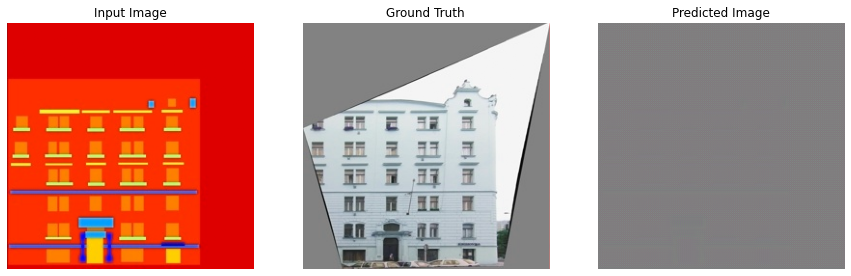

  1/400: [>...............................] - ETA 0.0s

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [6]:
utils.train(model = p2p, n_epochs = 100, dataloaders = dataloaders)

In [ ]:
input, real = next(iter(dataloaders['val']))

In [ ]:
utils.generate_images(model = p2p, input = input, real = real)

In [9]:
prediction = p2p.generator(input.to(utils.device))